In [4]:
#Ignore all the unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing dataset module
from datasets import list_datasets

In [6]:
#listing all datasets on Huggingface hub

#all_datasets = list_datasets()
#print(type(all_datasets))
#print(f"There are {len(all_datasets)} datasets currently available on the Hub")
#print(f"The first 10 are: {all_datasets[:10]}")

In [7]:
#all_datasets.index('dair-ai/emotion')

In [8]:
#Loading the dataset
from datasets import load_dataset

emotions = load_dataset('dair-ai/emotion')

In [9]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
print(type(emotions))
print(type(emotions['train']))

<class 'datasets.dataset_dict.DatasetDict'>
<class 'datasets.arrow_dataset.Dataset'>


In [11]:
# Accessing individual splits

train_ds = emotions["train"]
train_ds,len(train_ds)

(Dataset({
     features: ['text', 'label'],
     num_rows: 16000
 }),
 16000)

In [12]:
train_ds[:5]    #sample example

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [13]:
train_ds.column_names      #names of columns

['text', 'label']

In [14]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [15]:
# Creating a Dataframe

import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
len(df)

16000

In [17]:
# Let's add a new column with corresponding label names

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


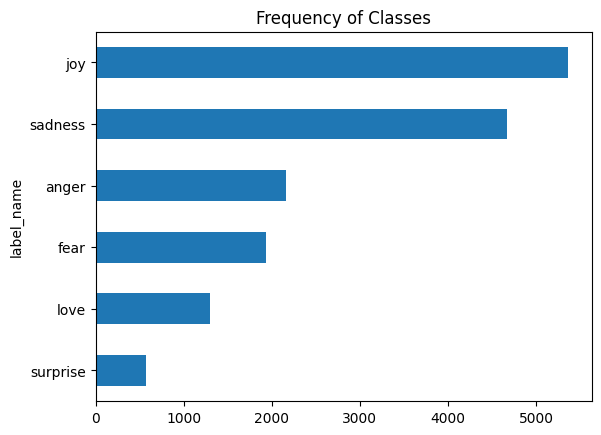

In [18]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

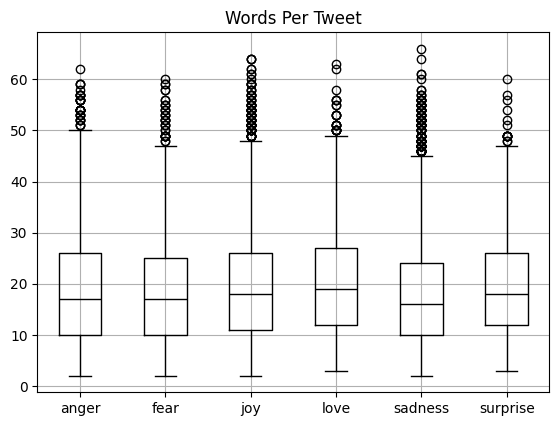

In [19]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label_name',grid='False',color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [20]:
# Resetting the format of datafrma as we don't need it anymore

emotions.reset_format()

In [21]:
# Text to Tokens

sample = 'Tokenizing text is a core task of NLP.'
sample

'Tokenizing text is a core task of NLP.'

## Character Tokenization

In [22]:
# Character Tokenization

tokenized_sample = list(sample)
tokenized_sample

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [23]:
# Creating token Ids

token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_sample)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [24]:
# We can now use this variable to get list of integers for the tokens

input_ids = [token2idx[token] for token in tokenized_sample]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [25]:
# One Hot Encodings

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [26]:
print(f"Token: {tokenized_sample[2]}")
print(f"Tensor index: {input_ids[2]}")
print(f"one-hot: {one_hot_encodings[2]}")

Token: k
Tensor index: 12
one-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization

In [27]:
# Word Tokenization

tokenized_sample = sample.split()
tokenized_sample

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

In [28]:
# Creating token Ids

token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_sample)))}
print(token2idx)

{'NLP.': 0, 'Tokenizing': 1, 'a': 2, 'core': 3, 'is': 4, 'of': 5, 'task': 6, 'text': 7}


In [29]:
# We can now use this variable to get list of integers for the tokens

input_ids = [token2idx[token] for token in tokenized_sample]
input_ids

[1, 7, 4, 2, 3, 6, 5, 0]

In [30]:
# One Hot Encodings

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([8, 8])

In [31]:
print(f"Token: {tokenized_sample[2]}")
print(f"Tensor index: {input_ids[2]}")
print(f"one-hot: {one_hot_encodings[2]}")

Token: is
Tensor index: 4
one-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0])


## Subword Tokenization

### WordPiece used by BERT and DistilBERT

In [32]:
from transformers import AutoTokenizer

In [33]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [34]:
# Alternative way - from transformers import DistilBertTokenizer

In [35]:
text_ids = tokenizer(sample)
print(text_ids)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [36]:
# Checking the words in model's vocab

tokens = tokenizer.convert_ids_to_tokens(text_ids.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [37]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [38]:
tokenizer.vocab_size

30522

In [39]:
tokenizer.model_max_length

512

In [40]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the Whole Dataset

In [41]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [42]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [43]:
# Note -  Attention masks helps model to ignore the padded areas of input tensors

In [44]:
# Applying to the whole dataset

emotions_encoded = emotions.map(tokenize, batched = True, batch_size=None)

In [45]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

## Transformers as Feature Extractors

In [46]:
from transformers import AutoModel

In [47]:
model_ckpt = 'distilbert-base-uncased'

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [49]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [55]:
## Example of getting last hidden states
text = "this is a test"
test_inps = tokenizer(text)
inputs = tokenizer(text, return_tensors='pt')
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [ ]:
# Note - Resulting tensor has shape [batch size, n_tokens]

In [56]:
tokenizer.convert_ids_to_tokens(test_inps.input_ids)

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']

In [57]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [59]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [60]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [66]:
outputs.last_hidden_state[:,0].shape   #Using just the hidden state of [CLS] token as it is common practice

torch.Size([1, 768])

In [78]:
## Let's do it for the whole dataset

def extract_hidden_states(batch):
    #Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

    #Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # Return Vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [79]:
#Note : We require our output back into cpu and numpy as map() function requires the processing function to return when we are using batched inputs

In [80]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask","label"])  #Since our model expects inputs as tensors

In [81]:
#Extracting hidden sates for the whole dataset

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map: 100%|████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1022.34 examples/s]


In [82]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [83]:
#Note : We got hidden state as column in our DatasetDictionary

In [84]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [85]:
#Training a Classifier on this hidden state

import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

### Training a Simple Classifier

In [86]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_valid, y_valid)

0.633

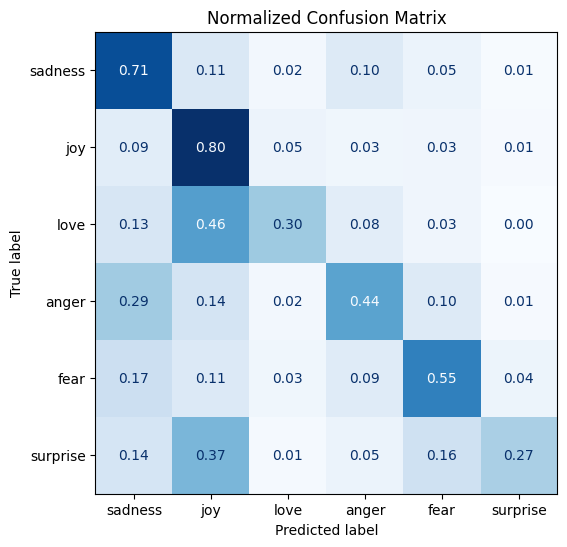

In [89]:
# Plotting a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize = (6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax=ax, colorbar = False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

labels = emotions["train"].features["label"].names
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds,y_valid, labels)

## Fine Tuning Transformers

In [90]:
from transformers import AutoModelForSequenceClassification

In [91]:
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [92]:
#Defining the metrics

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy" : acc, "f1" : f1}

In [93]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                 per_gpu_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 evaluation_strategy="epoch",
                                 disable_tqdm="False",
                                 logging_steps=logging_steps,
                                 log_level="error")

In [94]:
trainer = Trainer(model=model,
                 args=training_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded["train"],
                 eval_dataset=emotions_encoded["validation"],
                 tokenizer=tokenizer)

trainer.train()

{'loss': 0.8312, 'grad_norm': 4.787524223327637, 'learning_rate': 1e-05, 'epoch': 1.0}
{'eval_loss': 0.3248741924762726, 'eval_accuracy': 0.903, 'eval_f1': 0.9000187369218297, 'eval_runtime': 2.5639, 'eval_samples_per_second': 780.054, 'eval_steps_per_second': 12.481, 'epoch': 1.0}
{'loss': 0.2495, 'grad_norm': 6.385669708251953, 'learning_rate': 0.0, 'epoch': 2.0}
{'eval_loss': 0.2158621847629547, 'eval_accuracy': 0.9255, 'eval_f1': 0.9251548588152965, 'eval_runtime': 2.5684, 'eval_samples_per_second': 778.699, 'eval_steps_per_second': 12.459, 'epoch': 2.0}
{'train_runtime': 147.8628, 'train_samples_per_second': 216.417, 'train_steps_per_second': 3.382, 'train_loss': 0.5403533782958985, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5403533782958985, metrics={'train_runtime': 147.8628, 'train_samples_per_second': 216.417, 'train_steps_per_second': 3.382, 'train_loss': 0.5403533782958985, 'epoch': 2.0})

In [95]:
# Pred outputs
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.2158621847629547,
 'test_accuracy': 0.9255,
 'test_f1': 0.9251548588152965,
 'test_runtime': 2.31,
 'test_samples_per_second': 865.785,
 'test_steps_per_second': 13.853}

In [99]:
preds_output.predictions

array([[ 4.435983  , -0.9372854 , -0.59523684, -0.70643365, -0.8463705 ,
        -1.7217385 ],
       [ 4.379254  , -0.7737081 , -1.1420298 , -0.6483088 , -0.5508223 ,
        -1.569585  ],
       [-1.0512791 ,  1.7332721 ,  2.6972854 , -1.3055547 , -2.0430124 ,
        -1.5102726 ],
       ...,
       [-1.5018946 ,  4.245749  , -0.05305573, -1.479587  , -1.8818084 ,
        -1.2027218 ],
       [-1.5592543 ,  2.4505522 ,  2.4123194 , -1.4327683 , -1.9078777 ,
        -1.3724332 ],
       [-1.841237  ,  3.8767407 ,  0.11352424, -2.052207  , -1.7165521 ,
        -0.35477436]], dtype=float32)

In [96]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

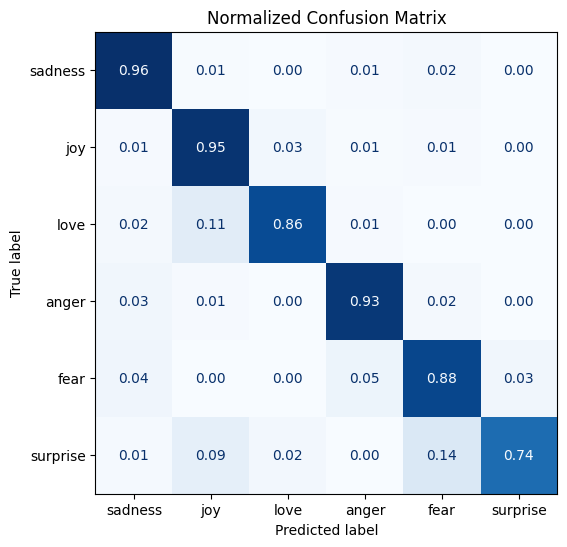

In [100]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [102]:
# Let's predict any example

from transformers import pipeline

classifier = pipeline("text-classification", model = model,tokenizer=tokenizer)

In [108]:
custom_tweet = "I saw Harry Potter today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

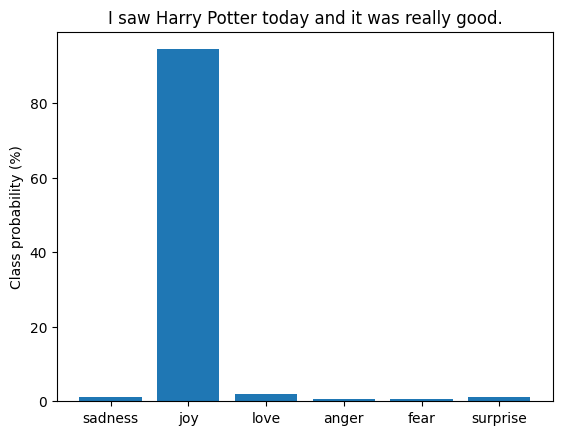

In [109]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 *preds_df["score"], color='C0')
plt.title(f"{custom_tweet}")
plt.ylabel("Class probability (%)")
plt.show()

In [111]:
!conda cee501 export  > env.yml

usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: argument COMMAND: invalid choice: 'cee501' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'pack', 'token', 'env', 'repo', 'server', 'verify')
